In [1]:
cd /content/drive/MyDrive/Git/ICT_Visual/Code

/content/drive/MyDrive/Git/ICT_Visual/Code


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.optimizers import SGD, Adam

In [3]:
try :
    loaded_data = np.loadtxt('../Data/diabetes.csv',delimiter=',')
    
    x_data = loaded_data[:, 0:-1]
    t_data = loaded_data[:, [-1]]

    print(f'x_data.shape = {x_data.shape}')
    print(f't_data.shape = {t_data.shape}')

except Exception as err:

    print(str(err))

x_data.shape = (759, 8)
t_data.shape = (759, 1)


In [4]:
print(x_data[:2])
print(t_data[:2])

s = np.arange(len(x_data)) # index 생성

# print(s)

np.random.shuffle(s)

# print(s)

x_data = x_data[s]
t_data = t_data[s]

print(x_data[:2])
print(t_data[:2])

[[-0.294118    0.487437    0.180328   -0.292929    0.          0.00149028
  -0.53117    -0.0333333 ]
 [-0.882353   -0.145729    0.0819672  -0.414141    0.         -0.207153
  -0.766866   -0.666667  ]]
[[0.]
 [1.]]
[[-0.764706   0.276382  -0.245902  -0.575758  -0.208038   0.0253354
  -0.916311  -0.966667 ]
 [-0.176471   0.0753769  0.213115   0.         0.        -0.117735
  -0.849701  -0.666667 ]]
[[1.]
 [0.]]


In [5]:
TEST_SPLIT_RATIO = 0.1

test_nums = int(TEST_SPLIT_RATIO*len(x_data))

print('test_nums = ', test_nums)

x_test = x_data[:test_nums]
t_test = t_data[:test_nums]

x_data = x_data[test_nums:]
t_data = t_data[test_nums:]

print(x_data.shape, t_data.shape)
print(x_test.shape, t_test.shape)


test_nums =  75
(684, 8) (684, 1)
(75, 8) (75, 1)


In [6]:
VAL_SPLIT_RATIO = 0.1

val_nums = int(VAL_SPLIT_RATIO*len(x_data))

print('val_nums = ', val_nums)

x_val = x_data[:val_nums]
t_val = t_data[:val_nums]

x_data = x_data[val_nums:]
t_data = t_data[val_nums:]

print(x_data.shape, t_data.shape)
print(x_val.shape, t_val.shape)


val_nums =  68
(616, 8) (616, 1)
(68, 8) (68, 1)


In [9]:
input_ = Input(shape=(x_data.shape[1]))

output_ = Dense(2, activation='softmax')(input_)

model = Model(inputs=input_, outputs=output_)

In [10]:
model.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [11]:
hist = model.fit(x_data, t_data, epochs=500, validation_data=(x_val, t_val), verbose=2)

Epoch 1/500
20/20 - 1s - loss: 0.7096 - accuracy: 0.5519 - val_loss: 0.6781 - val_accuracy: 0.5147 - 798ms/epoch - 40ms/step
Epoch 2/500
20/20 - 0s - loss: 0.6751 - accuracy: 0.5649 - val_loss: 0.6548 - val_accuracy: 0.5882 - 71ms/epoch - 4ms/step
Epoch 3/500
20/20 - 0s - loss: 0.6515 - accuracy: 0.5731 - val_loss: 0.6388 - val_accuracy: 0.5882 - 61ms/epoch - 3ms/step
Epoch 4/500
20/20 - 0s - loss: 0.6350 - accuracy: 0.6006 - val_loss: 0.6277 - val_accuracy: 0.6029 - 69ms/epoch - 3ms/step
Epoch 5/500
20/20 - 0s - loss: 0.6230 - accuracy: 0.6299 - val_loss: 0.6203 - val_accuracy: 0.6324 - 67ms/epoch - 3ms/step
Epoch 6/500
20/20 - 0s - loss: 0.6145 - accuracy: 0.6510 - val_loss: 0.6145 - val_accuracy: 0.6471 - 55ms/epoch - 3ms/step
Epoch 7/500
20/20 - 0s - loss: 0.6078 - accuracy: 0.6575 - val_loss: 0.6102 - val_accuracy: 0.6618 - 70ms/epoch - 3ms/step
Epoch 8/500
20/20 - 0s - loss: 0.6024 - accuracy: 0.6753 - val_loss: 0.6069 - val_accuracy: 0.7059 - 50ms/epoch - 3ms/step
Epoch 9/500
20

In [12]:
model.evaluate(x_test, t_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.4210 - accuracy: 0.8400


[0.42097991704940796, 0.8399999737739563]

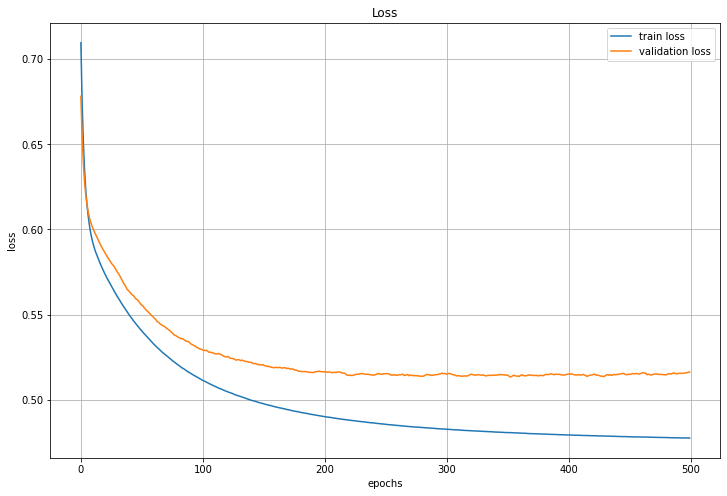

In [13]:
plt.figure(figsize=(12,8))
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

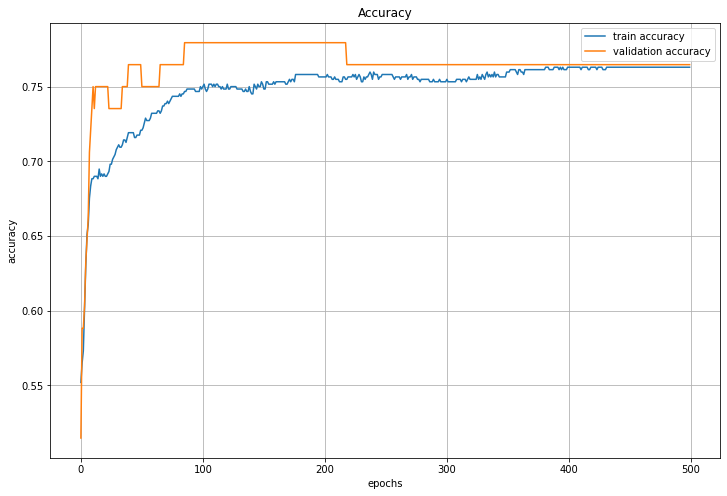

In [14]:
plt.figure(figsize=(12,8))
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()